## Fraud detection by CNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/Sony/Desktop/Kaggle data set/Fraud_detection/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D,Dropout,BatchNormalization,Dense,Flatten

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Balance dataset

In [9]:
non_fraud = df[df['Class']==0]
fraud = df[df['Class']==1]

In [10]:
non_fraud.shape , fraud.shape

((284315, 31), (492, 31))

In [11]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [12]:
data = pd.concat([non_fraud,fraud],ignore_index=True)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,143753.0,-1.451374,1.549270,0.644812,-0.871361,-0.348902,-0.882342,0.117890,0.335494,0.723650,...,-0.128019,-0.629888,0.000057,-0.116472,-0.332649,-0.320734,-0.443275,0.154146,0.77,0
1,132089.0,2.058393,0.081982,-1.685370,0.441764,0.315278,-0.872930,0.108271,-0.162367,0.631077,...,-0.363438,-0.982288,0.369474,0.552892,-0.318234,0.174132,-0.065705,-0.032077,1.98,0
2,111041.0,-0.351080,0.802192,-1.254923,-0.011764,1.614003,-1.910689,1.223248,-1.092691,2.017127,...,-0.199761,0.826712,-0.344172,0.032524,-0.582311,0.138211,0.316846,-0.180251,20.00,0
3,38668.0,1.142383,-0.214936,-1.232798,0.315810,2.124716,3.629377,-0.356037,0.832909,0.165085,...,-0.145501,-0.513853,-0.181780,1.013089,0.870219,-0.333305,0.013511,0.023358,71.00,0
4,39477.0,1.306802,0.029816,-0.546049,-0.317631,0.402488,-0.169676,0.219201,-0.146353,-0.290429,...,-0.094169,-0.306849,-0.246223,-0.937675,0.594873,1.070365,-0.107412,-0.021177,34.82,0


In [13]:
data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [14]:
x = data.drop(['Class'],axis=1)
x.shape

(984, 30)

In [15]:
y = data['Class']
y.shape

(984,)

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

In [17]:
x_train.shape , x_test.shape

((787, 30), (197, 30))

In [18]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
x_train.shape , x_test.shape

((787, 30), (197, 30))

In [20]:
type(x_train)

numpy.ndarray

In [31]:
y_test

(197,)

In [21]:
x_train = x_train.reshape(787,30,1)
x_test = x_test.reshape(197,30,1)
x_train.shape , x_test.shape

((787, 30, 1), (197, 30, 1))

In [22]:
x_train.shape

(787, 30, 1)

## Build CNN

In [23]:
model = Sequential()
model.add(Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=32,kernel_size=2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))




In [24]:
from tensorflow.keras.optimizers import Adam

In [25]:
model.compile(optimizer=Adam(lr=0.00005),loss = 'binary_crossentropy',metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 32)            2080      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 32)            128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 896)               0

In [27]:
history = model.fit(x_train,y_train, epochs =30,validation_data=(x_test,y_test),verbose =1)

Train on 787 samples, validate on 197 samples
Epoch 1/30
787/787 [==============================] - 4s 5ms/sample - loss: 1.4344 - accuracy: 0.4917 - val_loss: 0.6882 - val_accuracy: 0.6497
Epoch 2/30
787/787 [==============================] - 0s 588us/sample - loss: 1.0347 - accuracy: 0.5731 - val_loss: 0.6560 - val_accuracy: 0.7513
Epoch 3/30
787/787 [==============================] - 0s 362us/sample - loss: 0.9483 - accuracy: 0.6353 - val_loss: 0.6258 - val_accuracy: 0.7817
Epoch 4/30
787/787 [==============================] - 0s 337us/sample - loss: 0.8715 - accuracy: 0.6696 - val_loss: 0.5947 - val_accuracy: 0.7868
Epoch 5/30
787/787 [==============================] - 0s 338us/sample - loss: 0.6344 - accuracy: 0.7459 - val_loss: 0.5644 - val_accuracy: 0.8274
Epoch 6/30
787/787 [==============================] - 0s 337us/sample - loss: 0.6806 - accuracy: 0.7433 - val_loss: 0.5338 - val_accuracy: 0.8426
Epoch 7/30
787/787 [==============================] - 0s 337us/sample - loss: 0.

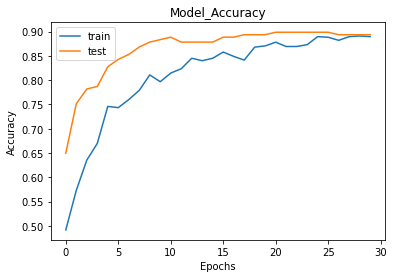

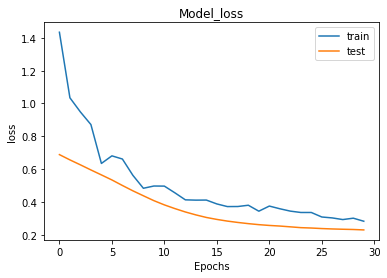

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model_Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'])
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report

In [47]:
y_pred = model.predict_classes(x_test)

In [40]:
confusion_matrix(y_test,y_pred)

array([[95,  4],
       [17, 81]], dtype=int64)

In [41]:
accuracy_score(y_test,y_pred)

0.8934010152284264

In [42]:
precision_score(y_test,y_pred)

0.9529411764705882

In [43]:
recall_score(y_test,y_pred)

0.826530612244898

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        99
           1       0.95      0.83      0.89        98

    accuracy                           0.89       197
   macro avg       0.90      0.89      0.89       197
weighted avg       0.90      0.89      0.89       197

